In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Importing necessary library**

In [2]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.1.1
    Uninstalling keras-3.1.1:
      Successfully uninstalled keras-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

2024-05-22 14:56:09.142581: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-22 14:56:09.142679: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-22 14:56:09.276018: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Installing tensorflow**

**setting the image fixed size for training and intializing the batch size, channel and number of epochs**

In [4]:
!pip install split-folders

In [5]:
import splitfolders

In [6]:
splitfolders.ratio('/kaggle/input/eye-diseases-classification/dataset', output="eye", seed=1337, ratio=(.8, .1, .1))

Copying files: 4217 files [00:29, 142.12 files/s]


In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="soIZkH5s1uNS8wbFSdvB")
project = rf.workspace("indian-servers-tm7c7").project("eye-diseases-py3fy")
version = project.version(1)
dataset = version.download("folder")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 34.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.2.2
    


Extracting Dataset Version Zip to eye-diseases-1 in folder:: 100%|██████████| 4231/4231 [00:00<00:00, 7609.64it/s]


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [9]:
Image_Size= 224
Batch_Size = 32
Channels=3
Epochs=50

**determining number of pics and classes**

In [10]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/eye-diseases-1/train",
    shuffle=True,
    image_size = (Image_Size,Image_Size),
    batch_size=Batch_Size
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/eye-diseases-1/test",
    shuffle=True,
    image_size = (Image_Size,Image_Size),
    batch_size=Batch_Size
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/eye-diseases-1/valid",
    shuffle=True,
    image_size = (Image_Size,Image_Size),
    batch_size=Batch_Size
)

Found 2951 files belonging to 4 classes.
Found 420 files belonging to 4 classes.
Found 843 files belonging to 4 classes.


**present class name**

In [11]:
class_names = train_data.class_names
class_names

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

In [12]:
for image_batch, label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 224, 224, 3)
[3 1 1 0 2 3 2 1 0 3 3 2 2 1 1 0 1 3 2 2 3 0 3 3 3 2 3 3 3 0 1 2]


**trying out for the first image**

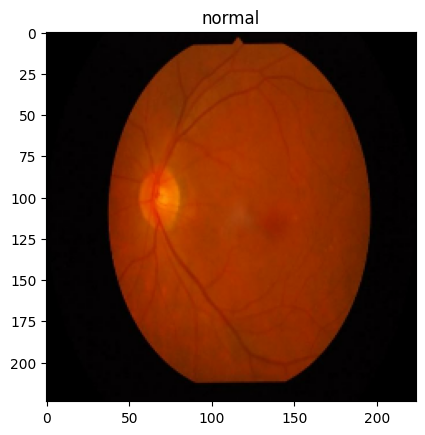

In [13]:
for image_batch, label_batch in train_data.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])

In [14]:
acc = []
model_list = []

In [15]:
n_classes = 4

In [16]:
from tensorflow.keras.applications import VGG19

input_shape = (Image_Size, Image_Size, Channels)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

model_vgg19 = models.Sequential([
    base_model,
    layers.GlobalMaxPooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])

model_vgg19.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


80134624/80134624 [==============================] - 0s 0us/step


In [17]:
history_vgg19 = model_vgg19.fit(train_data, validation_data=val_data, epochs=20)

Epoch 1/20


I0000 00:00:1716389856.871431      95 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


93/93 [==============================] - 46s 316ms/step - loss: 930046784.0000 - accuracy: 0.3870 - val_loss: 21213.6777 - val_accuracy: 0.4875
Epoch 2/20
93/93 [==============================] - 25s 268ms/step - loss: 224731462631424.0000 - accuracy: 0.2670 - val_loss: 97252736.0000 - val_accuracy: 0.2681
Epoch 3/20
93/93 [==============================] - 25s 268ms/step - loss: 424638777990840320.0000 - accuracy: 0.2569 - val_loss: 1547816824471552.0000 - val_accuracy: 0.2064
Epoch 4/20
93/93 [==============================] - 25s 267ms/step - loss: nan - accuracy: 0.2450 - val_loss: nan - val_accuracy: 0.2574
Epoch 5/20
93/93 [==============================] - 25s 266ms/step - loss: nan - accuracy: 0.2450 - val_loss: nan - val_accuracy: 0.2574
Epoch 6/20
93/93 [==============================] - 25s 266ms/step - loss: nan - accuracy: 0.2450 - val_loss: nan - val_accuracy: 0.2574
Epoch 7/20
93/93 [==============================] - 25s 266ms/step - loss: nan - accuracy: 0.2450 - val_lo

In [18]:
train_score = model_vgg19.evaluate(train_data)
valid_score = model_vgg19.evaluate(val_data)
test_score = model_vgg19.evaluate(test_data)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 30)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 30)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

14/14 [==============================] - 2s 152ms/step - loss: nan - accuracy: 0.2333
Train Loss:  nan
Train Accuracy:  0.2450016885995865
------------------------------
Validation Loss:  nan
Validation Accuracy:  0.25741398334503174
------------------------------
Test Loss:  nan
Test Accuracy:  0.23333333432674408


In [19]:
acc.append(test_score[1])
model_list.append("VGG19")
print(acc, model_list)

[0.23333333432674408] ['VGG19']


In [20]:
from tensorflow.keras.applications import ResNet50

input_shape = (Image_Size, Image_Size, Channels)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

model_resnet50 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model_resnet50.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


94765736/94765736 [==============================] - 1s 0us/step


In [21]:
model_resnet50.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               25690368  
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 49279108 (187.98 MB)
Trainable params: 49225988 (187.78 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [22]:
history_model_resnet50 = model_resnet50.fit(train_data, validation_data=val_data, epochs=20)

Epoch 1/20
93/93 [==============================] - 56s 235ms/step - loss: 2.7685 - accuracy: 0.7394 - val_loss: 3.6256 - val_accuracy: 0.5801
Epoch 2/20
93/93 [==============================] - 18s 196ms/step - loss: 0.4629 - accuracy: 0.8404 - val_loss: 0.6725 - val_accuracy: 0.7888
Epoch 3/20
93/93 [==============================] - 18s 196ms/step - loss: 0.3111 - accuracy: 0.8899 - val_loss: 0.2811 - val_accuracy: 0.8992
Epoch 4/20
93/93 [==============================] - 19s 197ms/step - loss: 0.3104 - accuracy: 0.9011 - val_loss: 0.3495 - val_accuracy: 0.8802
Epoch 5/20
93/93 [==============================] - 18s 196ms/step - loss: 0.2679 - accuracy: 0.9088 - val_loss: 0.4611 - val_accuracy: 0.8648
Epoch 6/20
93/93 [==============================] - 18s 196ms/step - loss: 0.1844 - accuracy: 0.9312 - val_loss: 0.2973 - val_accuracy: 0.9015
Epoch 7/20
93/93 [==============================] - 18s 197ms/step - loss: 0.1439 - accuracy: 0.9475 - val_loss: 0.4653 - val_accuracy: 0.8529

In [23]:
train_score = model_resnet50.evaluate(train_data)
valid_score = model_resnet50.evaluate(val_data)
test_score = model_resnet50.evaluate(test_data)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 30)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 30)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

14/14 [==============================] - 2s 109ms/step - loss: 0.4795 - accuracy: 0.8881
Train Loss:  0.04769068956375122
Train Accuracy:  0.9864452481269836
------------------------------
Validation Loss:  0.5752291679382324
Validation Accuracy:  0.8944246768951416
------------------------------
Test Loss:  0.4794806241989136
Test Accuracy:  0.8880952596664429


In [24]:
print(acc, model_list)

[0.23333333432674408] ['VGG19']


In [25]:
acc.append(test_score[1])
model_list.append("ResNet50")
print(acc, model_list)

[0.23333333432674408, 0.8880952596664429] ['VGG19', 'ResNet50']


In [26]:
Image_Size

224

In [27]:
from tensorflow.keras.applications import EfficientNetB0

input_shape = (Image_Size, Image_Size, Channels)
n_classes = 4

densenet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

model_efficientnetb0 = models.Sequential([
    densenet_base,
    layers.GlobalMaxPooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model_efficientnetb0.summary()


16705208/16705208 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_max_pooling2d_1 (Gl  (None, 1280)              0         
 obalMaxPooling2D)                                               
                                                                 
 dense_4 (Dense)             (None, 256)               327936    
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 4378535 (16.70 MB)
Trainable params: 4336512 (16.54 MB)
Non-trainable params: 42023 (164.16 KB)
___________

In [28]:
model_efficientnetb0.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


In [29]:
history_model_efficientnetb0 = model_efficientnetb0.fit(train_data, validation_data=val_data, epochs=30)

Epoch 1/30


2024-05-22 15:14:06.667746: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


93/93 [==============================] - 61s 261ms/step - loss: 1.2026 - accuracy: 0.7821 - val_loss: 0.3784 - val_accuracy: 0.8458
Epoch 2/30
93/93 [==============================] - 21s 223ms/step - loss: 0.2487 - accuracy: 0.9139 - val_loss: 0.5244 - val_accuracy: 0.8470
Epoch 3/30
93/93 [==============================] - 21s 221ms/step - loss: 0.3348 - accuracy: 0.8956 - val_loss: 0.4470 - val_accuracy: 0.8743
Epoch 4/30
93/93 [==============================] - 21s 222ms/step - loss: 0.1986 - accuracy: 0.9309 - val_loss: 0.3691 - val_accuracy: 0.8683
Epoch 5/30
93/93 [==============================] - 21s 223ms/step - loss: 0.1652 - accuracy: 0.9380 - val_loss: 0.2099 - val_accuracy: 0.9241
Epoch 6/30
93/93 [==============================] - 21s 220ms/step - loss: 0.1217 - accuracy: 0.9570 - val_loss: 0.1947 - val_accuracy: 0.9419
Epoch 7/30
93/93 [==============================] - 21s 221ms/step - loss: 0.1170 - accuracy: 0.9597 - val_loss: 0.2697 - val_accuracy: 0.9241
Epoch 8/30

In [30]:
history_model_efficientnetb0.history

{'loss': [1.2026381492614746,
  0.2486705631017685,
  0.3348418176174164,
  0.1985785961151123,
  0.16516435146331787,
  0.12171171605587006,
  0.116958387196064,
  0.10433695465326309,
  0.05091196671128273,
  0.10151080042123795,
  0.08258156478404999,
  0.05635350942611694,
  0.0475514754652977,
  0.04608151689171791,
  0.06895255297422409,
  0.037605170160532,
  0.15619806945323944,
  0.06405497342348099,
  0.1321110874414444,
  0.12977367639541626,
  0.06366082280874252,
  0.04512401297688484,
  0.03926648572087288,
  0.08042771369218826,
  0.012097254395484924,
  0.016944805160164833,
  0.008835992775857449,
  0.0136808967217803,
  0.048578135669231415,
  0.052942294627428055],
 'accuracy': [0.7821077704429626,
  0.9139274954795837,
  0.8956285715103149,
  0.9308708906173706,
  0.9379871487617493,
  0.9569637179374695,
  0.9596747159957886,
  0.962724506855011,
  0.9806845188140869,
  0.9698407053947449,
  0.9728905558586121,
  0.982717752456665,
  0.981701135635376,
  0.98508977

In [31]:
train_score = model_efficientnetb0.evaluate(train_data)
valid_score = model_efficientnetb0.evaluate(val_data)
test_score = model_efficientnetb0.evaluate(test_data)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 30)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 30)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

14/14 [==============================] - 2s 99ms/step - loss: 0.3997 - accuracy: 0.9071
Train Loss:  0.022228775545954704
Train Accuracy:  0.9932226538658142
------------------------------
Validation Loss:  0.3271120488643646
Validation Accuracy:  0.927639365196228
------------------------------
Test Loss:  0.39968380331993103
Test Accuracy:  0.9071428775787354


In [32]:
acc.append(test_score[1])
model_list.append("EfficientNetB0")
print(acc, model_list)

[0.23333333432674408, 0.8880952596664429, 0.9071428775787354] ['VGG19', 'ResNet50', 'EfficientNetB0']


In [33]:
from tensorflow.keras.applications import MobileNetV2

input_shape = (Image_Size, Image_Size, Channels)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

model_mobilenetv2 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model_mobilenetv2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])




9406464/9406464 [==============================] - 0s 0us/step


In [34]:
history_model_mobilenetv2 = model_mobilenetv2.fit(train_data, validation_data=val_data, epochs=20)

Epoch 1/20
93/93 [==============================] - 35s 120ms/step - loss: 1.4811 - accuracy: 0.7794 - val_loss: 13.1229 - val_accuracy: 0.2776
Epoch 2/20
93/93 [==============================] - 9s 97ms/step - loss: 0.3612 - accuracy: 0.8834 - val_loss: 18.3988 - val_accuracy: 0.2740
Epoch 3/20
93/93 [==============================] - 9s 98ms/step - loss: 0.2606 - accuracy: 0.9187 - val_loss: 25.1611 - val_accuracy: 0.3215
Epoch 4/20
93/93 [==============================] - 9s 97ms/step - loss: 0.3461 - accuracy: 0.9007 - val_loss: 26.7640 - val_accuracy: 0.5196
Epoch 5/20
93/93 [==============================] - 9s 97ms/step - loss: 0.4784 - accuracy: 0.8712 - val_loss: 16.1912 - val_accuracy: 0.2942
Epoch 6/20
93/93 [==============================] - 9s 97ms/step - loss: 0.2420 - accuracy: 0.9156 - val_loss: 12.6312 - val_accuracy: 0.2977
Epoch 7/20
93/93 [==============================] - 9s 97ms/step - loss: 0.3586 - accuracy: 0.8970 - val_loss: 8.2164 - val_accuracy: 0.3915
Epoch

In [35]:
train_score = model_mobilenetv2.evaluate(train_data)
valid_score = model_mobilenetv2.evaluate(val_data)
test_score = model_mobilenetv2.evaluate(test_data)


print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 30)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 30)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])


14/14 [==============================] - 1s 57ms/step - loss: 4.6362 - accuracy: 0.5310
Train Loss:  4.525850296020508
Train Accuracy:  0.5703151226043701
------------------------------
Validation Loss:  4.997572898864746
Validation Accuracy:  0.5575326085090637
------------------------------
Test Loss:  4.636162281036377
Test Accuracy:  0.5309523940086365


In [36]:
acc.append(test_score[1])
model_list.append("MobileNetV2")
print(acc, model_list)

[0.23333333432674408, 0.8880952596664429, 0.9071428775787354, 0.5309523940086365] ['VGG19', 'ResNet50', 'EfficientNetB0', 'MobileNetV2']


**Predicting Labels for a Batch of Images**

In [37]:
from tensorflow.keras.applications import InceptionV3

input_shape = (Image_Size, Image_Size, Channels)
n_classes = 4

inceptionv3_base = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

model_inceptionv3 = models.Sequential([
    inceptionv3_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model_inceptionv3.summary()


87910968/87910968 [==============================] - 0s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_8 (Dense)             (None, 256)               524544    
                                                                 
 dense_9 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 22328356 (85.18 MB)
Trainable params: 22293924 (85.04 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________


In [38]:
model_inceptionv3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


In [39]:
history_model_inceptionv3 = model_inceptionv3.fit(train_data, validation_data=val_data, epochs=20)

Epoch 1/20
93/93 [==============================] - 57s 225ms/step - loss: 0.5822 - accuracy: 0.7875 - val_loss: 22.2512 - val_accuracy: 0.4887
Epoch 2/20
93/93 [==============================] - 15s 161ms/step - loss: 0.3261 - accuracy: 0.8855 - val_loss: 8.1794 - val_accuracy: 0.4674
Epoch 3/20
93/93 [==============================] - 15s 162ms/step - loss: 0.3413 - accuracy: 0.8868 - val_loss: 0.6862 - val_accuracy: 0.7711
Epoch 4/20
93/93 [==============================] - 15s 161ms/step - loss: 0.2274 - accuracy: 0.9146 - val_loss: 0.2973 - val_accuracy: 0.9241
Epoch 5/20
93/93 [==============================] - 15s 161ms/step - loss: 0.2168 - accuracy: 0.9265 - val_loss: 1.0287 - val_accuracy: 0.7402
Epoch 6/20
93/93 [==============================] - 15s 161ms/step - loss: 0.2726 - accuracy: 0.9011 - val_loss: 0.9321 - val_accuracy: 0.6631
Epoch 7/20
93/93 [==============================] - 15s 161ms/step - loss: 0.1496 - accuracy: 0.9512 - val_loss: 0.2787 - val_accuracy: 0.931

In [40]:
train_score = model_inceptionv3.evaluate(train_data)
valid_score = model_inceptionv3.evaluate(val_data)
test_score = model_inceptionv3.evaluate(test_data)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 30)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 30)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])


14/14 [==============================] - 2s 157ms/step - loss: 0.7181 - accuracy: 0.8762
Train Loss:  0.11514144390821457
Train Accuracy:  0.9630633592605591
------------------------------
Validation Loss:  0.6285372972488403
Validation Accuracy:  0.9027283787727356
------------------------------
Test Loss:  0.7180730700492859
Test Accuracy:  0.8761904835700989


In [41]:
acc.append(test_score[1])
model_list.append("InceptionV3")
print(acc, model_list)



[0.23333333432674408, 0.8880952596664429, 0.9071428775787354, 0.5309523940086365, 0.8761904835700989] ['VGG19', 'ResNet50', 'EfficientNetB0', 'MobileNetV2', 'InceptionV3']


In [42]:
from tensorflow.keras.applications import DenseNet121

input_shape = (Image_Size, Image_Size, Channels)
n_classes = 4

densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

model_densenet = models.Sequential([
    densenet_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model_densenet.summary()


29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten_2 (Flatten)         (None, 50176)             0         
                                                                 
 dense_10 (Dense)            (None, 256)               12845312  
                                                                 
 dense_11 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 19883844 (75.85 MB)
Trainable params: 19800196 (75.53 MB)
Non-trainable params: 83648 (326.75 KB)
_________________________________________________________________


In [43]:
model_densenet.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


In [44]:
history_model_densenet = model_densenet.fit(train_data, validation_data=val_data, epochs=20)

Epoch 1/20
93/93 [==============================] - 92s 304ms/step - loss: 5.0007 - accuracy: 0.4937 - val_loss: 2723.7219 - val_accuracy: 0.3665
Epoch 2/20
93/93 [==============================] - 20s 212ms/step - loss: 1.2756 - accuracy: 0.6479 - val_loss: 99.8137 - val_accuracy: 0.6121
Epoch 3/20
93/93 [==============================] - 20s 212ms/step - loss: 0.8135 - accuracy: 0.7384 - val_loss: 1.8214 - val_accuracy: 0.6228
Epoch 4/20
93/93 [==============================] - 20s 212ms/step - loss: 0.4787 - accuracy: 0.8190 - val_loss: 6.5257 - val_accuracy: 0.4650
Epoch 5/20
93/93 [==============================] - 20s 211ms/step - loss: 0.7705 - accuracy: 0.6835 - val_loss: 17.7380 - val_accuracy: 0.3962
Epoch 6/20
93/93 [==============================] - 20s 211ms/step - loss: 0.5730 - accuracy: 0.7811 - val_loss: 1.4462 - val_accuracy: 0.5647
Epoch 7/20
93/93 [==============================] - 20s 211ms/step - loss: 0.4920 - accuracy: 0.8106 - val_loss: 2.0704 - val_accuracy: 0

In [45]:
train_score = model_densenet.evaluate(train_data)
valid_score = model_densenet.evaluate(val_data)
test_score = model_densenet.evaluate(test_data)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 30)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 30)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

14/14 [==============================] - 3s 220ms/step - loss: 0.9044 - accuracy: 0.6929
Train Loss:  0.8046122789382935
Train Accuracy:  0.7031514644622803
------------------------------
Validation Loss:  0.9066643118858337
Validation Accuracy:  0.6785290837287903
------------------------------
Test Loss:  0.904418408870697
Test Accuracy:  0.6928571462631226


In [46]:
acc.append(test_score[1])
model_list.append("DenseNet121")
print(acc, model_list)

[0.23333333432674408, 0.8880952596664429, 0.9071428775787354, 0.5309523940086365, 0.8761904835700989, 0.6928571462631226] ['VGG19', 'ResNet50', 'EfficientNetB0', 'MobileNetV2', 'InceptionV3', 'DenseNet121']


In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [48]:
gen_testing = datagen.flow_from_directory(
    "/kaggle/working/eye-diseases-1/test",
    target_size=(224, 224),
    batch_size=20
)

Found 420 images belonging to 4 classes.


In [49]:
from PIL import Image
y_actual_path = gen_testing.filepaths
y_actual = gen_testing.labels
from sklearn.metrics import accuracy_score

In [50]:
acc_test = []

In [51]:
model_name_list = [model_vgg19,model_resnet50,model_efficientnetb0,model_mobilenetv2,model_inceptionv3,model_densenet]

In [52]:
y_actual_path

['/kaggle/working/eye-diseases-1/test/cataract/0_left_jpg.rf.3f213a7a648d8515e31cdae65dadb41f.jpg',
 '/kaggle/working/eye-diseases-1/test/cataract/1102_left_jpg.rf.9efd9e0290caff02d629773e720bde0f.jpg',
 '/kaggle/working/eye-diseases-1/test/cataract/1144_left_jpg.rf.b95972448fb3b340d228c1434668a20e.jpg',
 '/kaggle/working/eye-diseases-1/test/cataract/1144_right_jpg.rf.49621f9b86f9fb142d7349dcd8ee3b25.jpg',
 '/kaggle/working/eye-diseases-1/test/cataract/1167_right_jpg.rf.294859757092dacc24580804e2f69d91.jpg',
 '/kaggle/working/eye-diseases-1/test/cataract/1484_left_jpg.rf.a7682a5a5019bbba44ef789bc8d1b61b.jpg',
 '/kaggle/working/eye-diseases-1/test/cataract/1484_right_jpg.rf.d67be768b424161462b9d17462186710.jpg',
 '/kaggle/working/eye-diseases-1/test/cataract/2126_left_jpg.rf.04581767e21baa613ad7ab3768178287.jpg',
 '/kaggle/working/eye-diseases-1/test/cataract/2127_left_jpg.rf.293f5403a1a75e23f9a44c1f4c6aca81.jpg',
 '/kaggle/working/eye-diseases-1/test/cataract/2132_left_jpg.rf.8a9d13469

In [53]:
image_path = '/kaggle/working/eye-diseases-1/test/normal/2826_left_jpg.rf.e94badaffe652c222f3d07d9a812d459.jpg'
image = Image.open(image_path)
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = model_efficientnetb0.predict(img_array)
class_labels = class_names
score = tf.nn.softmax(predictions[0])
max_index = np.array(predictions).argmax()
target = class_labels[max_index]
print(max_index)

1/1 [==============================] - 2s 2s/step
2


In [54]:
for md in model_name_list:
    y_pred = []
    for image_path in y_actual_path:
        image = Image.open(image_path)
        img = image.resize((224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        # Make predictions
        predictions = md.predict(img_array)
        class_labels = class_names
        score = tf.nn.softmax(predictions[0])
        max_index = np.array(predictions).argmax()
        target = class_labels[max_index]
        y_pred.append(max_index)
    acc_test.append(accuracy_score(y_actual,y_pred))

1/1 [==============================] - 0s 30ms/step


In [55]:
acc_test

[0.23333333333333334,
 0.8809523809523809,
 0.9119047619047619,
 0.5452380952380952,
 0.8690476190476191,
 0.6666666666666666]

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

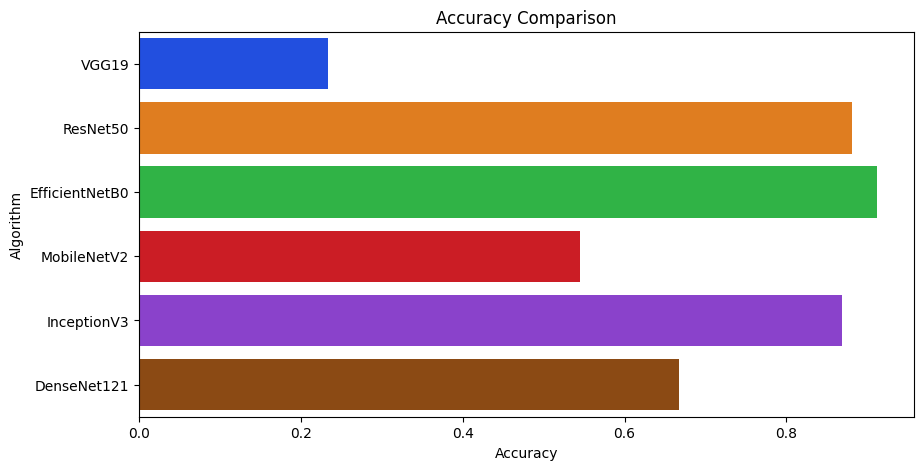

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc_test,y = model_list,palette='bright')

In [57]:
accuracy_models = dict(zip(model_list, acc_test))
for k, v in accuracy_models.items():
    print (k, '-->', v)
     

VGG19 --> 0.23333333333333334
ResNet50 --> 0.8809523809523809
EfficientNetB0 --> 0.9119047619047619
MobileNetV2 --> 0.5452380952380952
InceptionV3 --> 0.8690476190476191
DenseNet121 --> 0.6666666666666666


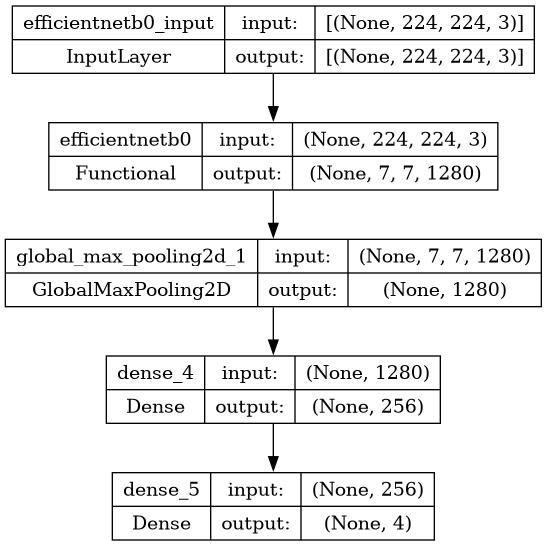

In [58]:
from tensorflow.keras.utils import plot_model
plot_model(model_efficientnetb0, show_shapes=True, to_file='cnn_model.png')

In [59]:
import matplotlib.pyplot as plt

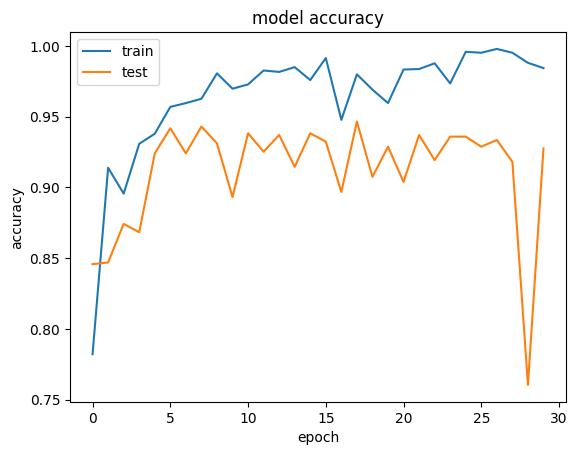

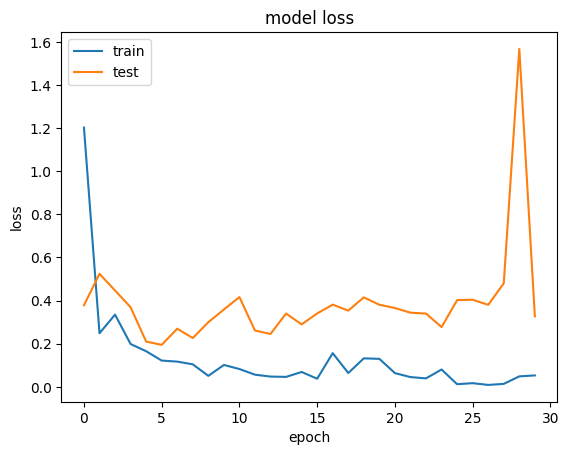

In [60]:
plt.plot(history_model_efficientnetb0.history['accuracy'])
plt.plot(history_model_efficientnetb0.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_model_efficientnetb0.history['loss'])
plt.plot(history_model_efficientnetb0.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [61]:
y_pred = []
for image_path in y_actual_path:
    image = Image.open(image_path)
    img = image.resize((224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    # Make predictions
    predictions = model_efficientnetb0.predict(img_array)
    class_labels = class_names
    score = tf.nn.softmax(predictions[0])
    max_index = np.array(predictions).argmax()
    target = class_labels[max_index]
    y_pred.append(max_index)

1/1 [==============================] - 0s 26ms/step


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_actual, y_pred,digits=4, target_names=class_names))

                      precision    recall  f1-score   support

            cataract     0.9000    0.9184    0.9091        98
diabetic_retinopathy     1.0000    1.0000    1.0000       104
            glaucoma     0.8750    0.8667    0.8708       105
              normal     0.8750    0.8673    0.8711       113

            accuracy                         0.9119       420
           macro avg     0.9125    0.9131    0.9128       420
        weighted avg     0.9118    0.9119    0.9118       420



In [63]:
from sklearn.metrics import confusion_matrix


result = confusion_matrix(y_actual, y_pred)

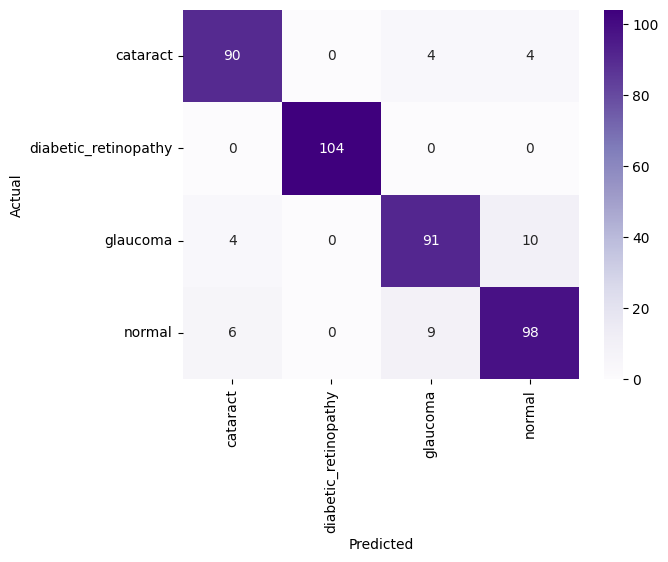

In [64]:
import pandas as pd
import seaborn as sns
label_names= class_names
df_cm = pd.DataFrame(result, columns=label_names, index=label_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Purples", annot=True, fmt='.0f'); # font size


In [65]:
model_efficientnetb0.save("model_eye.h5")

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


**Image Prediction Function Using the Model**

In [66]:
def pred(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [67]:
from tensorflow.keras.models import load_model

In [68]:
test_model = load_model('/kaggle/working/model_eye.h5')

# Show the model architecture
test_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_max_pooling2d_1 (Gl  (None, 1280)              0         
 obalMaxPooling2D)                                               
                                                                 
 dense_4 (Dense)             (None, 256)               327936    
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 4378535 (16.70 MB)
Trainable params: 4336512 (16.54 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________


In [69]:
train_score = test_model.evaluate(train_data)
valid_score = test_model.evaluate(val_data)
test_score = test_model.evaluate(test_data)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 30)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 30)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

14/14 [==============================] - 1s 43ms/step - loss: 0.3997 - accuracy: 0.9071
Train Loss:  0.022228766232728958
Train Accuracy:  0.9932226538658142
------------------------------
Validation Loss:  0.32711201906204224
Validation Accuracy:  0.927639365196228
------------------------------
Test Loss:  0.39968380331993103
Test Accuracy:  0.9071428775787354


In [70]:
y_pred = []
for image_path in y_actual_path:
    image = Image.open(image_path)
    img = image.resize((224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    # Make predictions
    predictions = model_efficientnetb0.predict(img_array)
    class_labels = class_names
    score = tf.nn.softmax(predictions[0])
    max_index = np.array(predictions).argmax()
    
    #target = class_labels[max_index]
    y_pred.append(max_index)

1/1 [==============================] - 0s 29ms/step


In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_pred,y_actual, digits=4))

              precision    recall  f1-score   support

           0     0.9184    0.9000    0.9091       100
           1     1.0000    1.0000    1.0000       104
           2     0.8667    0.8750    0.8708       104
           3     0.8673    0.8750    0.8711       112

    accuracy                         0.9119       420
   macro avg     0.9131    0.9125    0.9128       420
weighted avg     0.9121    0.9119    0.9120       420

